<h1>Final Project - MDdDM</h1>
<h3>As the final project, we must create a segmentation aiming to target insurances customers based on the K-Means clustering method</h3>

<p>Nickolas Lago - 03/11/2020 - First Commit - V_0.01</p>

<h3>Project Description</h3>
As a Data Mining/Analytic Consultant, you are asked develop a Customer Segmentation in such a way that it will be possible for the Marketing Department to better understand all the different Customers’ Profiles.

You are expected to define, describe and explain the clusters you chose. Invest time in reasoning how you want to do your clustering, possible approaches, and advantages or disadvantages of different decisions. Simultaneous, you should express the marketing approach you recommend for each cluster. 

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Business Understanding</h2>

# TBD

<h2>Data Import and Understanding</h2>

<p>To import the data, we will simply use the function .read_sas from <b>Pandas<b> and call our DataFrame <b>"df"<b>.<p>
<p>Later, we will use some descriptive methods to understand our DataFrame and be prepare to work on it<p>
<h4>Descrtiptive Methods:<h4>
<ul>
<il>.info()<il>
<il>.unique()<il>
<il>.describe()<il>
<il>.isnull()<il>
<ul>

In [169]:
#First things first, let's import our .sas7bdat file to a Pandas DataFrame and see its first records.
df = pd.read_sas('a2z_insurance.sas7bdat')

df.head()

CustID  FirstPolYear  BirthYear             EducDeg  MonthSal  GeoLivArea  \
0     1.0        1985.0     1982.0  b'2 - High School'    2177.0         1.0   
1     2.0        1981.0     1995.0  b'2 - High School'     677.0         4.0   
2     3.0        1991.0     1970.0        b'1 - Basic'    2277.0         3.0   
3     4.0        1990.0     1981.0      b'3 - BSc/MSc'    1099.0         4.0   
4     5.0        1986.0     1973.0      b'3 - BSc/MSc'    1763.0         4.0   

   Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
0       1.0      380.97        0.39     375.85          79.45      146.36   
1       1.0     -131.13        1.12      77.46         416.20      116.69   
2       0.0      504.67        0.28     206.15         224.50      124.58   
3       1.0      -16.99        0.99     182.48          43.35      311.17   
4       1.0       35.23        0.90     338.62          47.80      182.59   

   PremLife  PremWork  
0     47.01     16.89  
1    194.48    106.13  
2     86.35     99.02  
3     35.34     28.34  
4     18.78     41.45

In [170]:
#At first, we can understand that the DataFrame has mainly numeric values, basides the column for EducDeg, let's check for the DataFrame .info() to confirm this insight.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [171]:
#Once we know that EducDeg is the only categorical value, let's check if there is no duplicated or miss writed values inside the DataFrame
df['EducDeg'].unique()

array([b'2 - High School', b'1 - Basic', b'3 - BSc/MSc', b'4 - PhD', nan],
      dtype=object)

In [172]:
# Summary statistics for all variables
summary=df.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

count unique             top  freq      mean       std     min  \
CustID         10296    NaN             NaN   NaN    5148.5   2972.34       1   
FirstPolYear   10266    NaN             NaN   NaN   1991.06   511.268    1974   
BirthYear      10279    NaN             NaN   NaN   1968.01   19.7095    1028   
EducDeg        10279      4  b'3 - BSc/MSc'  4799       NaN       NaN     NaN   
MonthSal       10260    NaN             NaN   NaN   2506.67   1157.45     333   
GeoLivArea     10295    NaN             NaN   NaN   2.70986   1.26629       1   
Children       10275    NaN             NaN   NaN  0.706764  0.455268       0   
CustMonVal     10296    NaN             NaN   NaN   177.893   1945.81 -165680   
ClaimsRate     10296    NaN             NaN   NaN  0.742772   2.91696       0   
PremMotor      10262    NaN             NaN   NaN    300.47   211.915   -4.11   
PremHousehold  10296    NaN             NaN   NaN   210.431   352.596     -75   
PremHealth     10253    NaN             NaN   NaN   171.581   296.406   -2.11   
PremLife       10192    NaN             NaN   NaN   41.8558   47.4806      -7   
PremWork       10210    NaN             NaN   NaN   41.2775   51.5136     -12   

                   25%     50%      75%      max  
CustID         2574.75  5148.5  7722.25    10296  
FirstPolYear      1980    1986     1992    53784  
BirthYear         1953    1968     1983     2001  
EducDeg            NaN     NaN      NaN      NaN  
MonthSal          1706  2501.5  3290.25    55215  
GeoLivArea           1       3        4        4  
Children             0       1        1        1  
CustMonVal       -9.44  186.87  399.778  11875.9  
ClaimsRate        0.39    0.72     0.98    256.2  
PremMotor       190.59  298.61    408.3  11604.4  
PremHousehold    49.45   132.8   290.05  25048.8  
PremHealth       111.8  162.81   219.82    28272  
PremLife          9.89   25.56    57.79    398.3  
PremWork         10.67   25.67    56.79   1988.7

In [173]:
# Check missing values
print(df.isnull().sum())

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64


<h2>Finding and Dealing with Outliers</h2>

Before removing NaN values, we will deal with the Outliers in order to be able to use the data base mean later without overestimating the values.

Source: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [174]:
#See where we find the outliers from the three colums selected
out_cols = ['FirstPolYear', 'BirthYear', 'MonthSal']

outliers = df[out_cols].describe()
outliers = outliers.transpose()
outliers.head(len(summary))

count         mean          std     min     25%     50%  \
FirstPolYear  10266.0  1991.062634   511.267913  1974.0  1980.0  1986.0   
BirthYear     10279.0  1968.007783    19.709476  1028.0  1953.0  1968.0   
MonthSal      10260.0  2506.667057  1157.449634   333.0  1706.0  2501.5   

                  75%      max  
FirstPolYear  1992.00  53784.0  
BirthYear     1983.00   2001.0  
MonthSal      3290.25  55215.0

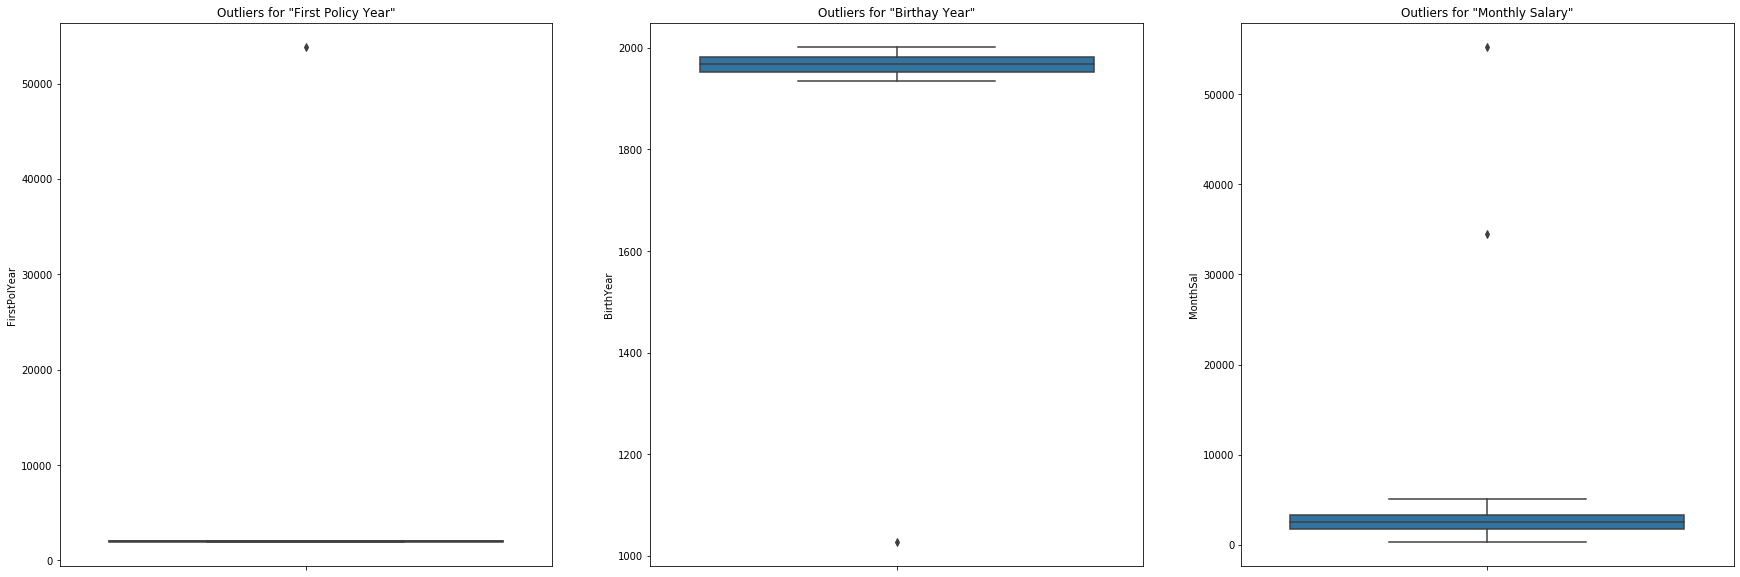

In [175]:
#Visualizing Outliers Box Plots

plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
sns.boxplot(y='FirstPolYear', data=df)
plt.title('Outliers for "First Policy Year"')

plt.subplot(1,3,2)
sns.boxplot(y='BirthYear', data=df)
plt.title('Outliers for "Birthay Year"')

plt.subplot(1,3,3)
sns.boxplot(y='MonthSal', data=df)
plt.title('Outliers for "Monthly Salary"')

plt.show()

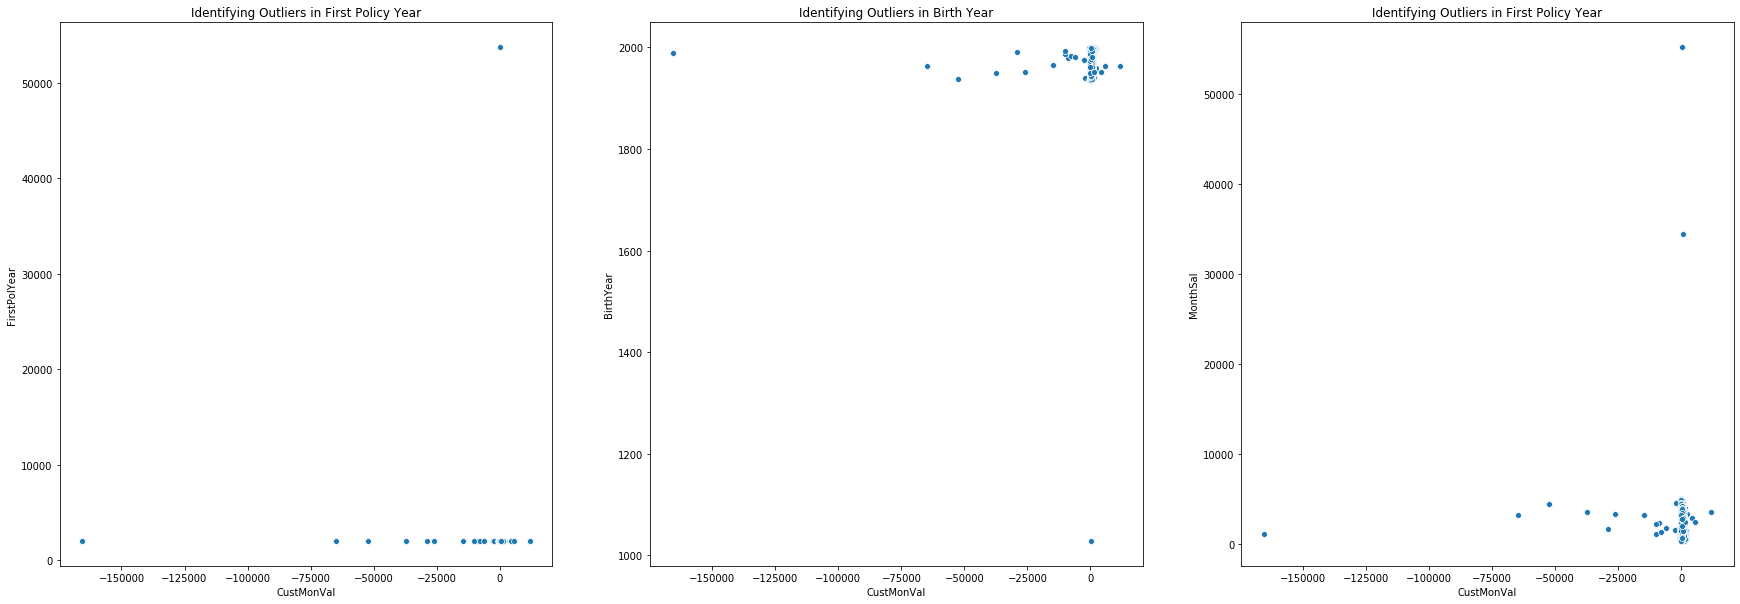

In [176]:
plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
sns.scatterplot(data=df, x='CustMonVal', y='FirstPolYear')
plt.title('Identifying Outliers in First Policy Year')

plt.subplot(1,3,2)
sns.scatterplot(data=df, x='CustMonVal', y='BirthYear')
plt.title('Identifying Outliers in Birth Year')

plt.subplot(1,3,3)
sns.scatterplot(data=df, x='CustMonVal', y='MonthSal')
plt.title('Identifying Outliers in First Policy Year')

plt.show()

<h3>Escrever algo sobre identificação dos outliers e remoção deles. São pouquissimos, em firstYearPol e birthYea são provavelmente errados e em salário não vale a pena tratar no modelo, tais clientes requerem melhor atenção<h3>
<h3>Também dá pra identificar no scatterplot que há um grande gap em CustMonVal, tal cliente também pode ser tratado a parte<h3>

In [177]:
#Further analysis on monthSalary

df['FirstPolYear'].describe(percentiles=[0.0005,0.005,0.01,0.15,0.25,0.5,0.7,0.9])

count    10266.000000
mean      1991.062634
std        511.267913
min       1974.000000
0.05%     1974.000000
0.5%      1974.000000
1%        1974.000000
15%       1978.000000
25%       1980.000000
50%       1986.000000
70%       1991.000000
90%       1995.000000
max      53784.000000
Name: FirstPolYear, dtype: float64

In [178]:
df_test2 = df[(df['MonthSal'] > 350) & (df['MonthSal'] < 30000) & (df['BirthYear'] > 1600) & (df['FirstPolYear'] < 2000)]

df_test2.shape

(10198, 14)

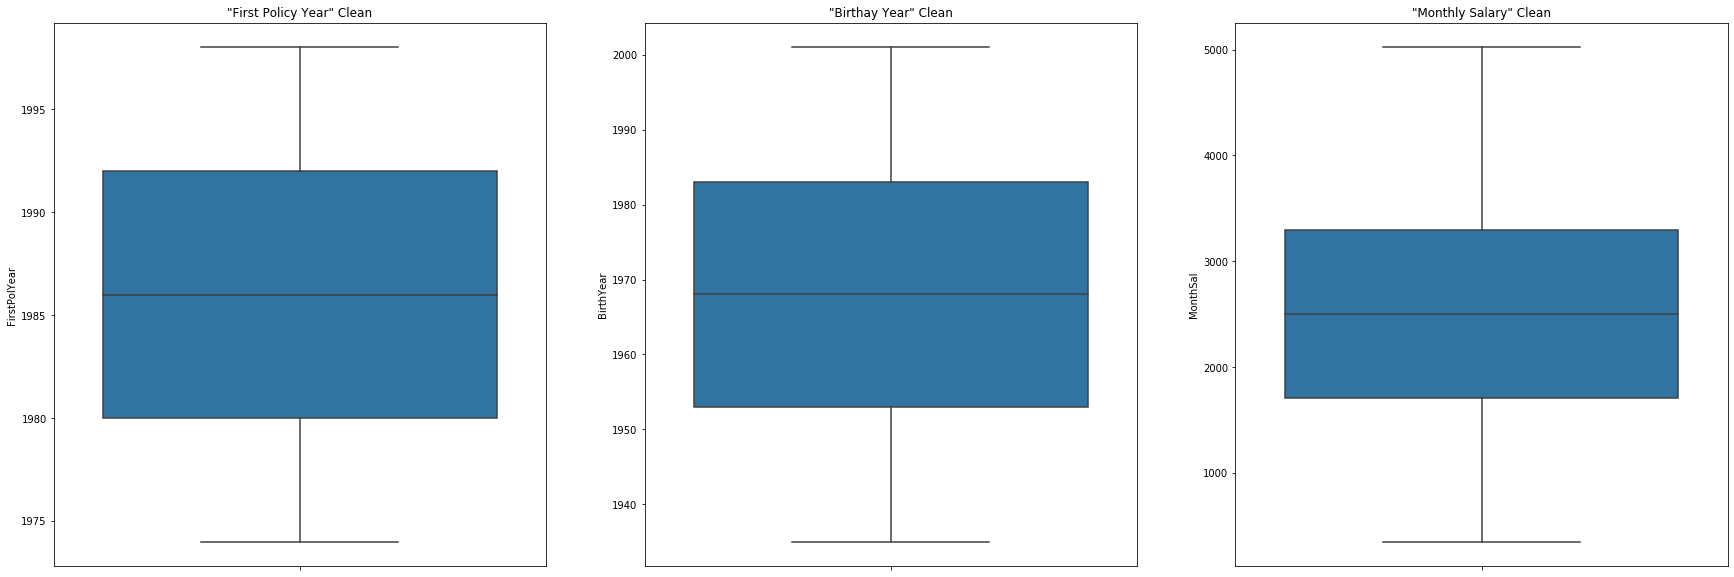

In [179]:
#Após observar erros e discrepancias nas colunas de BrithYear, FirstPolYear e MonthSal, foi removido de BirthYear  e FirstpolYear o que parecia erros de preenchimento e na coluna MonthSal foi removido dois clientes com um salário superior aos demais que podem ser tratados especialmente por nossa equipe de marketing e alguns clientes com um salário muito baixo que poderiam afetar nosso modelo (os clientes removidos não apresentavam anomalias no CustMonVal).

df_test = df[df['MonthSal'] > 350]
df_test = df_test[df_test['BirthYear'] > 1600]
df_test = df_test[df_test['MonthSal'] < 30000]
df_test = df_test[df_test['FirstPolYear'] < 2000]

plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
sns.boxplot(y='FirstPolYear', data=df_test)
plt.title('"First Policy Year" Clean')

plt.subplot(1,3,2)
sns.boxplot(y='BirthYear', data=df_test)
plt.title('"Birthay Year" Clean')

plt.subplot(1,3,3)
sns.boxplot(y='MonthSal', data=df_test)
plt.title('"Monthly Salary" Clean')

plt.show()

In [180]:
#Porcentagem de valores em df_tes comparado com df
print(df_test2.shape[0] / df.shape[0])
print(df_test2.shape)
print(df.shape)

0.9904817404817405
(10198, 14)
(10296, 14)


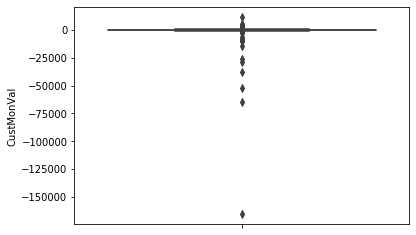

In [181]:
#Agora que já lidamos com as colunas menos sensíveis, vamos tentar identificar alguns outliers na coluna de CustMonVal. Lembrando que não devemos simplesmente limpar nossa basse, pois o modelo também deve ser capaz de agrupar tais clientes em caso que representem excesso de despesas ou qualquer outra situação

sns.boxplot(y='CustMonVal', data=df_test)

(10188, 14)


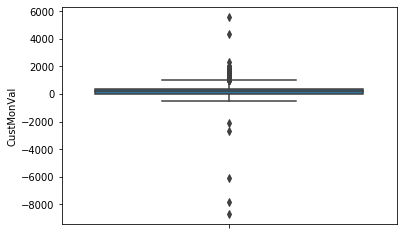

In [182]:
#A melhor forma de reduzir o numero de outliers sem danificar muito a base é por tirar aqueles que representam um CustMonVal menor que -10.000  

df_test2 = df_test2[df_test['CustMonVal'] > -10000]
df_test2 = df_test2[df_test['CustMonVal'] < 10000]


sns.boxplot(y='CustMonVal', data=df_test2)

print(df_test2.shape)

In [183]:
#Porcentagem de valores em df_tes comparado com df
print(df.shape[0] - df_test.shape[0])
print(df_test.shape[0] / df.shape[0])

98
0.9904817404817405


In [184]:
#Done dealing with outliers, we can build a excel file with them and send it sepparately to the marketing department to further analysis.

#CREATE OUTLIERS TABLE

<h3>Outliers Solution</h3>
<p>After analysing the data, we could exclude a total of 48 records that we identified as outliers. These records were grouped in a excel file that we could later send to the marketing department to be treated separately.</p>
<p>Our new table df_test contain 0.995% of the records from the original one.</p>

<h2>Dealing with NaN Values</h2>

In [185]:
#Deletando as rows que tem valores faltando para Children, EducDeg e GeoLivArea
cols = ['GeoLivArea','Children','EducDeg']
df_test = df.dropna(axis=0, how='any',subset=cols)

print(df_test.isna().sum())
print(df_test.shape)

CustID             0
FirstPolYear       7
BirthYear         17
EducDeg            0
MonthSal          35
GeoLivArea         0
Children           0
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        42
PremLife         104
PremWork          85
dtype: int64
(10258, 14)


By dropping the NaN values in the columns ('GeoLivArea','Children','EducDeg') we will loose only 0,4% of our Data Base. It could be useful to use the model to cluster the other 97% and deal with the rest 

Support links:

http://towardsdatascience.com/handling-missing-values-with-pandas-b876bf6f008f

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [186]:
df_test['MonthSal'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.999])

count    10223.000000
mean      2506.062213
std       1158.155554
min        333.000000
10%       1175.000000
25%       1705.000000
50%       2500.000000
75%       3290.000000
90%       3823.000000
99.9%     4866.336000
max      55215.000000
Name: MonthSal, dtype: float64

In [187]:
df_test['MonthSal'].mean()

2506.0622126577327

In [188]:
#Now, lets try to fill the other missing values with their means

#For salary and ages, we will use the means for each column, and for the First Policy Year, we will use the value just before to fill the 

mean = round(df_test['MonthSal'].mean())
print(mean)
df_test['MonthSal'].fillna(mean, inplace=True)

2506


In [189]:
df_test.isna().sum()

CustID             0
FirstPolYear       7
BirthYear         17
EducDeg            0
MonthSal           0
GeoLivArea         0
Children           0
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        42
PremLife         104
PremWork          85
dtype: int64

In [190]:
#Finding the mean() of the BirthYear and rounding it
bDay_mean = round(df_test['BirthYear'].mean())
bDay_mean

1968

In [191]:
#Replacing bday year by the round of the bday year mean.
bDay_mean = round(df_test['BirthYear'].mean())
print(bDay_mean)
df_test['BirthYear'].fillna(bDay_mean, inplace=True)
print(df_test.isna().sum())

1968
CustID             0
FirstPolYear       7
BirthYear          0
EducDeg            0
MonthSal           0
GeoLivArea         0
Children           0
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        42
PremLife         104
PremWork          85
dtype: int64


In [192]:
#Found an error for the First Policy Year -> Outlier
df_test2['FirstPolYear'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.995])

count    10188.000000
mean      1986.026600
std          6.609468
min       1974.000000
10%       1977.000000
25%       1980.000000
50%       1986.000000
75%       1992.000000
90%       1995.000000
99.5%     1998.000000
max       1998.000000
Name: FirstPolYear, dtype: float64